## Imports

In [27]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [5]:
names = ['mpg', 'cylinders','displacement', 'horsepower',
         'weight', 'acceleration', 'model year', 'origin', 'car name']

In [6]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data',
                 header=None,delim_whitespace=True,names=names,na_values='?')

## Part C

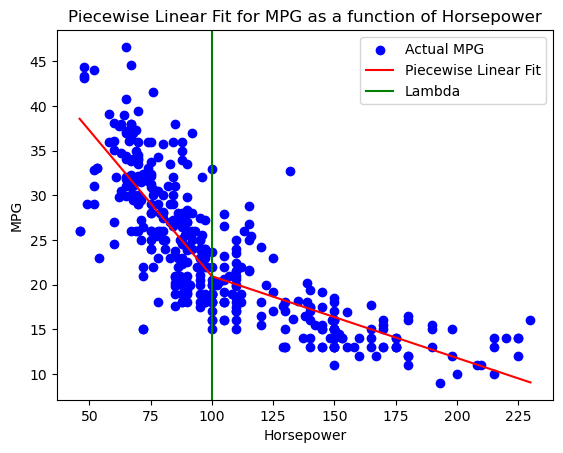

In [26]:
#Part C
#Sort and clean data
df = df.dropna(subset=['horsepower', 'mpg'])
df = df.sort_values('horsepower')
lambda_value = 100

# Transform the input data
df['x_before'] = df['horsepower']
df['x_after'] = np.where(df['horsepower'] >= lambda_value, df['horsepower'] - lambda_value, 0)

# Data matrix X
X = df[['x_before', 'x_after']]
X = np.hstack([np.ones((X.shape[0], 1)), X])  # Add a column of ones for the intercept

# Vector y
y = df['mpg'].values

# Fit the model using linear regression
model = LinearRegression(fit_intercept=False)
model.fit(X, y)

# Extract optimal values for a1, s1, s2
a1 = model.coef_[0]
s1 = model.coef_[1]
s2 = s1 + model.coef_[2]

# Make predictions
df['mpg_pred'] = model.predict(X)

# Plot the result
plt.scatter(df['horsepower'], df['mpg'], color='blue', label='Actual MPG')
plt.plot(df['horsepower'], df['mpg_pred'], color='red', label='Piecewise Linear Fit')

# Highlight the lambda value
plt.axvline(x=lambda_value, color='green', linestyle='-', label='Lambda')

plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()
plt.title('Piecewise Linear Fit for MPG as a function of Horsepower')
plt.show()


## Part D

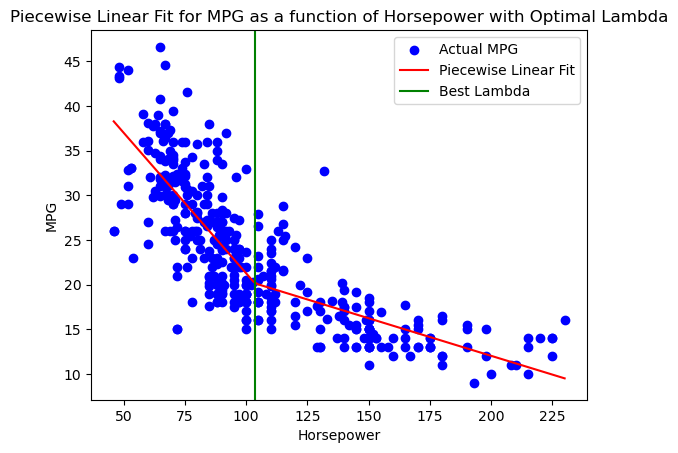

Best Lambda: 103.6161616161616


In [35]:
#Part D

#Sort and clean data
df = df.dropna(subset=['horsepower', 'mpg'])
df = df.sort_values('horsepower')

#Simply replace lambda to a set and run loops to test the minimum loss
lambda_values = np.linspace(df['horsepower'].min(), df['horsepower'].max(), 100)
best_lambda = lambda_values[0]
lowest_loss = float('inf')

# Try each lambda value to find the best one
for lambda_value in lambda_values:
    # Transform the data according to the current lambda_value
    df['x_before'] = df['horsepower']
    df['x_after'] = np.where(df['horsepower'] >= lambda_value, df['horsepower'] - lambda_value, 0)
    
    # Form the data matrix X
    X = df[['x_before', 'x_after']]
    X = np.hstack([np.ones((X.shape[0], 1)), X])  # Add a column of ones for the intercept
    
    # Fit the model using linear regression
    model = LinearRegression(fit_intercept=False)
    model.fit(X, df['mpg'])
    
    # Calculate RSS
    predictions = model.predict(X)
    loss = mean_squared_error(df['mpg'], predictions)
    
    # Update the best_lambda if the current lambda_value gives a better fit
    if loss < lowest_loss:
        lowest_loss = loss
        best_lambda = lambda_value

# Refit the model using the best lambda value
df['x_after'] = np.where(df['horsepower'] >= best_lambda, df['horsepower'] - best_lambda, 0)
X = df[['x_before', 'x_after']]
X = np.hstack([np.ones((X.shape[0], 1)), X])
model.fit(X, df['mpg'])

# Extract optimal values for a1, s1, s2
a1 = model.coef_[0]
s1 = model.coef_[1]
s2 = s1 + model.coef_[2]

# Make predictions using the final model
df['mpg_pred'] = model.predict(X)

# Plot the result
plt.scatter(df['horsepower'], df['mpg'], color='blue', label='Actual MPG')
plt.plot(df['horsepower'], df['mpg_pred'], color='red', label='Piecewise Linear Fit')
plt.axvline(x=best_lambda, color='green', linestyle='-', label='Best Lambda')

plt.xlabel('Horsepower')
plt.ylabel('MPG')
plt.legend()
plt.title('Piecewise Linear Fit for MPG as a function of Horsepower with Optimal Lambda')
plt.show()

# Output the best lambda value
print('Best Lambda: '+ str(best_lambda))